## Librerías

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway,pearsonr, ttest_ind, ttest_rel, shapiro, levene, mannwhitneyu, kruskal, chi2_contingency, normaltest,skew, kurtosis

import re


## Carga de datos

In [159]:
df= pd.read_csv('/Users/isaromobru/Desktop/DS102024_/ordenadores/train.csv')

In [160]:
df
df.copy()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.00
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.00
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.00
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,399.00
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16GB,1TB SSD,Intel Iris Graphics 540,Windows 10,1.3kg,1799.00
909,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,1537.39
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg,989.00


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [162]:
df.shape

(912, 13)

In [163]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [164]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

## Visiones generales de como están compuestas cada variable

In [165]:
df['Company'].value_counts()

Company
Lenovo       214
Dell         211
HP           197
Asus         103
Acer          73
Toshiba       32
MSI           30
Apple         15
Samsung        6
Razer          6
Mediacom       5
Microsoft      4
Xiaomi         3
Chuwi          3
Google         3
LG             2
Fujitsu        2
Huawei         2
Vero           1
Name: count, dtype: int64

In [166]:
df['Product'].value_counts()

Product
XPS 13                                         21
Inspiron 3567                                  20
Legion Y520-15IKBN                             15
Vostro 3568                                    14
Inspiron 5570                                  13
                                               ..
X705UV-BX074T (i3-6006U/4GB/1TB/GeForce         1
UX410UA-GV097T (i3-7100U/4GB/256GB/FHD/W10)     1
Tecra A50-D-11D                                 1
15-bs018nq (i3-6006U/4GB/500GB/FHD/No           1
Thinkpad T470s                                  1
Name: count, Length: 475, dtype: int64

In [167]:
df['TypeName'].value_counts()

TypeName
Notebook              522
Ultrabook             140
Gaming                130
2 in 1 Convertible     83
Workstation            19
Netbook                18
Name: count, dtype: int64

In [168]:
df['Inches'].value_counts()

Inches
15.6    468
14.0    146
13.3    111
17.3    101
12.5     29
11.6     27
12.0      5
12.3      4
13.5      4
13.9      4
10.1      3
15.0      2
13.0      2
15.4      2
11.3      1
18.4      1
17.0      1
14.1      1
Name: count, dtype: int64

In [169]:
df['Memory'].value_counts()

Memory
256GB SSD                        289
1TB HDD                          155
500GB HDD                        100
512GB SSD                         87
128GB SSD +  1TB HDD              56
128GB SSD                         52
256GB SSD +  1TB HDD              45
32GB Flash Storage                29
2TB HDD                           12
1TB SSD                           11
64GB Flash Storage                11
1.0TB Hybrid                       8
512GB SSD +  1TB HDD               8
256GB Flash Storage                7
256GB SSD +  2TB HDD               5
16GB Flash Storage                 5
32GB SSD                           4
128GB Flash Storage                4
16GB SSD                           3
180GB SSD                          3
1TB SSD +  1TB HDD                 2
512GB SSD +  2TB HDD               2
128GB SSD +  2TB HDD               2
8GB SSD                            1
240GB SSD                          1
512GB Flash Storage                1
64GB Flash Storage +  1TB HDD  

In [170]:
df['OpSys'].value_counts()

OpSys
Windows 10      755
No OS            48
Linux            40
Windows 7        28
Chrome OS        20
macOS             9
Mac OS X          6
Windows 10 S      5
Android           1
Name: count, dtype: int64

In [171]:
df['Price_euros'].value_counts()

Price_euros
1799.00    10
1499.00    10
1299.00     9
1099.00     9
899.00      9
           ..
493.00      1
857.07      1
923.00      1
1388.00     1
3949.40     1
Name: count, Length: 598, dtype: int64

In [172]:
df['Product'].value_counts()

Product
XPS 13                                         21
Inspiron 3567                                  20
Legion Y520-15IKBN                             15
Vostro 3568                                    14
Inspiron 5570                                  13
                                               ..
X705UV-BX074T (i3-6006U/4GB/1TB/GeForce         1
UX410UA-GV097T (i3-7100U/4GB/256GB/FHD/W10)     1
Tecra A50-D-11D                                 1
15-bs018nq (i3-6006U/4GB/500GB/FHD/No           1
Thinkpad T470s                                  1
Name: count, Length: 475, dtype: int64

In [173]:
df['Ram'].value_counts()

Ram
8GB     431
4GB     269
16GB    133
6GB      28
2GB      18
12GB     17
32GB     13
24GB      2
64GB      1
Name: count, dtype: int64

In [174]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                350
1366x768                                         204
IPS Panel Full HD 1920x1080                      158
IPS Panel Full HD / Touchscreen 1920x1080         36
Full HD / Touchscreen 1920x1080                   28
1600x900                                          16
Touchscreen 1366x768                              14
Quad HD+ / Touchscreen 3200x1800                  10
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
IPS Panel 4K Ultra HD 3840x2160                    8
4K Ultra HD / Touchscreen 3840x2160                7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              5
IPS Panel Retina Display 2304x1440                 5
IPS Panel 1366x768                                 5
IPS Panel Touchscreen 2560x1440                    4
IPS Panel Retina Display 2560x1600                 4
1440x900                                           4
Touchscreen 2256x1504        

In [175]:
df['TypeName'].value_counts()

TypeName
Notebook              522
Ultrabook             140
Gaming                130
2 in 1 Convertible     83
Workstation            19
Netbook                18
Name: count, dtype: int64

In [176]:
df['Weight'].value_counts()

Weight
2.2kg     90
2.1kg     43
2.5kg     32
2.4kg     30
2.3kg     26
          ..
4.7kg      1
4.33kg     1
2.33kg     1
1.10kg     1
1.76kg     1
Name: count, Length: 161, dtype: int64

In [177]:
df['laptop_ID'].value_counts()

laptop_ID
531     1
1223    1
78      1
1267    1
161     1
       ..
229     1
1157    1
683     1
294     1
205     1
Name: count, Length: 912, dtype: int64

In [178]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     134
Intel Core i7 7700HQ 2.8GHz     98
Intel Core i7 7500U 2.7GHz      95
Intel Core i5 8250U 1.6GHz      54
Intel Core i3 6006U 2GHz        46
                              ... 
Intel Core i5 1.3GHz             1
Intel Core i5 6440HQ 2.6GHz      1
Intel Core i7 7500U 2.5GHz       1
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 6560U 2.2GHz       1
Name: count, Length: 101, dtype: int64

In [179]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620       202
Intel HD Graphics 520       129
Intel UHD Graphics 620       47
Nvidia GeForce GTX 1050      45
AMD Radeon 530               33
                           ... 
Intel HD Graphics 530         1
AMD Radeon R5 430             1
AMD FirePro W5130M            1
Nvidia GeForce GTX 940M       1
Nvidia GeForce GTX 1070M      1
Name: count, Length: 91, dtype: int64

### Cambiar tipo de dato

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [181]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36kg,889.00
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.24kg,1813.00
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56kg,1049.00
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,0.98kg,1899.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,399.00
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16GB,1TB SSD,Intel Iris Graphics 540,Windows 10,1.3kg,1799.00
909,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93kg,1537.39
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.4kg,989.00


In [182]:
#inches
df['Inches']=df['Inches'].astype('float')

In [183]:
# Weight
# voy a comprobar si todo esta en kg 
# Verifica si TODOS los valores contienen 'kg'
cantidad_con_kg = df['Weight'].str.contains('kg', case=False).sum()
print(f"Valores con 'kg': {cantidad_con_kg} de {len(df)}")

# Cambiar la etiqueta e indicar que esta en kg 
df.rename(columns={'Weight': 'Weight_kg'}, inplace=True)
# borrar kg y pasarlo a numerico
df['Weight_kg'] = df['Weight_kg'].str.replace('kg', '', regex=False).str.strip()
df['Weight_kg'] = df['Weight_kg'].astype(float)

# Mostrar el resultado
print(df)

Valores con 'kg': 912 de 912
     laptop_ID Company             Product            TypeName  Inches  \
0         1223    Dell       Inspiron 5567            Notebook    15.6   
1           78  Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
2         1267    Dell              XPS 13  2 in 1 Convertible    13.3   
3          161    Dell       Inspiron 5579  2 in 1 Convertible    15.6   
4          922      LG         Gram 14Z970           Ultrabook    14.0   
..         ...     ...                 ...                 ...     ...   
907        709  Lenovo   IdeaPad 320-15AST            Notebook    15.6   
908        947  Lenovo      Yoga 900-13ISK  2 in 1 Convertible    13.3   
909        590    Dell       Latitude 5580            Notebook    15.6   
910       1143  Lenovo  Legion Y520-15IKBN              Gaming    15.6   
911        531    Dell       Inspiron 5770            Notebook    17.3   

                               ScreenResolution                          Cpu  \
0 

In [184]:
#ram
# Comprobar si todo esta GB
cantidad_con_gb = df['Ram'].str.contains('GB', case=False).sum()
print(f"Valores con 'GB': {cantidad_con_gb} de {len(df)}")
# Cambiar la etiqueta e indicar que esta en GB
df.rename(columns={'Ram': 'Ram_GB'}, inplace=True)
# borrar GB y pasarlo a numerico
df['Ram_GB'] = df['Ram_GB'].str.replace('GB', '', regex=False).str.strip()
df['Ram_GB'] = df['Ram_GB'].astype(int)

Valores con 'GB': 912 de 912


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram_GB            912 non-null    int64  
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight_kg         912 non-null    float64
 12  Price_euros       912 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 92.8+ KB


In [186]:
# Convertir los object en categoricas 
text_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 
                'Gpu', 'OpSys']

for col in text_columns:
    df[col] = df[col].astype('category')

In [187]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,889.00
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,1813.00
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,1049.00
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,0.98,1899.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4,256GB SSD,AMD Radeon 530,Windows 10,2.20,399.00
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16,1TB SSD,Intel Iris Graphics 540,Windows 10,1.30,1799.00
909,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,1537.39
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.40,989.00


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   laptop_ID         912 non-null    int64   
 1   Company           912 non-null    category
 2   Product           912 non-null    category
 3   TypeName          912 non-null    category
 4   Inches            912 non-null    float64 
 5   ScreenResolution  912 non-null    category
 6   Cpu               912 non-null    category
 7   Ram_GB            912 non-null    int64   
 8   Memory            912 non-null    object  
 9   Gpu               912 non-null    category
 10  OpSys             912 non-null    category
 11  Weight_kg         912 non-null    float64 
 12  Price_euros       912 non-null    float64 
dtypes: category(7), float64(3), int64(2), object(1)
memory usage: 80.1+ KB


## Screen resolution

In [189]:
#ScreenResolution
#Agrupar las medidas en una nueva columna 
df['Resolución'] = df['ScreenResolution'].apply(
    lambda x: re.search(r'(\d{3,4}x\d{3,4})', x).group(0) if re.search(r'(\d{3,4}x\d{3,4})', x) else None)
#Crear otra variable para características de la pantalla



In [190]:
# Extraer y crear nuevas columnas
df['tipo_pantalla'] = df['ScreenResolution'].str.extract(r'^(\w+)')

In [191]:
df['tipo_pantalla'].value_counts()


tipo_pantalla
Full           378
IPS            253
1366x768       204
Touchscreen     31
1600x900        16
Quad            12
4K              12
1440x900         4
1920x1080        2
Name: count, dtype: int64

In [192]:
df['tipo_pantalla'] = df['tipo_pantalla'].replace({
    '1366x768': 'HD',
    '1600x900':'HD+',
    '1920x1080':'Full HD',
    '1440x900':'WXGA+',
    '2560x1440':'Quad-HD'
    })

## Memoria

In [193]:
df['Memory'].unique

<bound method Series.unique of 0                 256GB SSD
1                   2TB HDD
2                 256GB SSD
3                 256GB SSD
4                 512GB SSD
               ...         
907               256GB SSD
908                 1TB SSD
909               256GB SSD
910    128GB SSD +  1TB HDD
911    128GB SSD +  1TB HDD
Name: Memory, Length: 912, dtype: object>

In [194]:
def clean_and_normalize_memory(value):
    value=str(value).lower().strip() # para que el valor sea un string
    match= re.match(r'(\d+(\.\d+)?)(\s*(gb|mb|tb)?)?', value)
    if match:
        numero= float(match.group(1)) #sacar el número
        unidad= match.group(3).strip() if match.group(3) else '' #captura la unidad
        # cambiar unidades
        if 'gb' in unidad or unidad =='':
            return numero
        elif 'mb' in unidad:
            return numero/ 1024
        elif 'tb' in unidad:
            return numero * 1024
    return None 
df['Memoria']=df['Memory'].apply(clean_and_normalize_memory)

In [195]:
# Función para extraer tipos de memoria
def extraer_tipos(almacenamiento):
    tipos = []
    if 'SSD' in almacenamiento:
        tipos.append('SSD')
    if 'HDD' in almacenamiento:
        tipos.append('HDD')
    if 'Flash Storage' in almacenamiento:
        tipos.append('Flash Storage')
    if 'Hybrid' in almacenamiento:
        tipos.append('Hybrid')
    return ', '.join(tipos)  # Combinar los tipos encontrados en una cadena separada por comas

# Crear una nueva columna con los tipos de memoria extraídos
df['Tipos_Memoria'] = df['Memory'].apply(extraer_tipos)

df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,Resolución,tipo_pantalla,Memoria,Tipos_Memoria
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,889.00,1920x1080,Full,256.0,SSD
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,519.00,1920x1080,Full,2048.0,HDD
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,1813.00,3200x1800,Quad,256.0,SSD
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,1049.00,1920x1080,Full,256.0,SSD
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,0.98,1899.00,1920x1080,IPS,512.0,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4,256GB SSD,AMD Radeon 530,Windows 10,2.20,399.00,1920x1080,Full,256.0,SSD
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16,1TB SSD,Intel Iris Graphics 540,Windows 10,1.30,1799.00,3200x1800,IPS,1024.0,SSD
909,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,1537.39,1920x1080,Full,256.0,SSD
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,No OS,2.40,989.00,1920x1080,IPS,128.0,"SSD, HDD"


In [196]:
df['Tipos_Memoria'].value_counts() #comprobar que están todos los tipos 

Tipos_Memoria
SSD                   454
HDD                   269
SSD, HDD              121
Flash Storage          57
Hybrid                  8
SSD, Hybrid             2
HDD, Flash Storage      1
Name: count, dtype: int64

In [197]:
df.isna().sum()  # verificación que no ha generado nningun na

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram_GB              0
Memory              0
Gpu                 0
OpSys               0
Weight_kg           0
Price_euros         0
Resolución          0
tipo_pantalla       0
Memoria             0
Tipos_Memoria       0
dtype: int64

## Cpu

In [198]:
df['tipo_cpu'] = df['Cpu'].str.extract(r'^(.*)\s')
df['tipo_cpu'].value_counts()

tipo_cpu
Intel Core i5 7200U     135
Intel Core i7 7700HQ     99
Intel Core i7 7500U      96
Intel Core i3 6006U      60
Intel Core i5 8250U      54
                       ... 
Intel Atom Z8350          1
Intel Core i7 8650U       1
Intel Core M 7Y30         1
Intel Core i5 6440HQ      1
Intel Core i7 6560U       1
Name: count, Length: 81, dtype: int64

In [199]:
# Comprobar si todo esta GB
cantidad_con_ghz = df['Cpu'].str.contains('GHz', case=False).sum()
print(f"Valores con 'GHz': {cantidad_con_ghz} de {len(df)}")
#Sacar la velocidad de cpu
df['velocidad_cpu_ghz'] = df['Cpu'].str.extract(r'(\d+(?:\.\d+)?)GHz')


Valores con 'GHz': 912 de 912


In [200]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              134
Intel Core i7 7700HQ 2.8GHz              98
Intel Core i7 7500U 2.7GHz               95
Intel Core i5 8250U 1.6GHz               54
Intel Core i3 6006U 2GHz                 46
                                       ... 
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Pentium Quad Core N3700 1.6GHz      1
Intel Xeon E3-1505M V6 3GHz               1
Intel Xeon E3-1535M v5 2.9GHz             1
Intel Xeon E3-1535M v6 3.1GHz             1
Name: count, Length: 101, dtype: int64

## Gpu

In [201]:
#Gpu
df[['marca_gpu', 'modelo_gpu']] = df['Gpu'].str.extract(r'(\w+) (.*)')
df['modelo_gpu'].value_counts()


modelo_gpu
HD Graphics 620      202
HD Graphics 520      129
UHD Graphics 620      47
GeForce GTX 1050      45
Radeon 530            33
                    ... 
HD Graphics 530        1
Radeon R5 430          1
FirePro W5130M         1
GeForce GTX 940M       1
GeForce GTX 1070M      1
Name: count, Length: 91, dtype: int64

# Opsys

In [202]:
df['marca_gpu'].value_counts()

marca_gpu
Intel     521
Nvidia    264
AMD       127
Name: count, dtype: int64

In [203]:
df['OpSys'].value_counts()

OpSys
Windows 10      755
No OS            48
Linux            40
Windows 7        28
Chrome OS        20
macOS             9
Mac OS X          6
Windows 10 S      5
Android           1
Name: count, dtype: int64

In [204]:
#OpSys
df['OpSys_general']= df['OpSys'].replace({ 
    'Windows 10':'Windows',
    'Windows 7':'Windows',
    'Windows 10 S':'Windows',
    'Linux':'Linux',
    'MacOS':'MacOS',
    'Mac OS X':'MacOS',
    'Android':'Android',
    'Chrome OS':'Chrome OS',
    'No OS':'Sin OS'
    })

/var/folders/pq/mppvlq_j3_7b5gpr_bpc5khm0000gn/T/ipykernel_66919/1254323877.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['OpSys_general']= df['OpSys'].replace({


In [205]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,...,Price_euros,Resolución,tipo_pantalla,Memoria,Tipos_Memoria,tipo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,1223,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,...,889.00,1920x1080,Full,256.0,SSD,Intel Core i5 7200U,2.5,AMD,Radeon R7 M445,Windows
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,...,519.00,1920x1080,Full,2048.0,HDD,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,Sin OS
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,...,1813.00,3200x1800,Quad,256.0,SSD,Intel Core i5 7Y54,1.2,Intel,HD Graphics 615,Windows
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,...,1049.00,1920x1080,Full,256.0,SSD,Intel Core i7 8550U,1.8,Intel,UHD Graphics 620,Windows
4,922,LG,Gram 14Z970,Ultrabook,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,...,1899.00,1920x1080,IPS,512.0,SSD,Intel Core i7 7500U,2.7,Intel,HD Graphics 620,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4,256GB SSD,AMD Radeon 530,...,399.00,1920x1080,Full,256.0,SSD,AMD A9-Series 9420,2.9,AMD,Radeon 530,Windows
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6560U 2.2GHz,16,1TB SSD,Intel Iris Graphics 540,...,1799.00,3200x1800,IPS,1024.0,SSD,Intel Core i7 6560U,2.2,Intel,Iris Graphics 540,Windows
909,590,Dell,Latitude 5580,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16,256GB SSD,Nvidia GeForce 930MX,...,1537.39,1920x1080,Full,256.0,SSD,Intel Core i7 7600U,2.8,Nvidia,GeForce 930MX,Windows
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,...,989.00,1920x1080,IPS,128.0,"SSD, HDD",Intel Core i5 7300HQ,2.5,Nvidia,GeForce GTX 1060,Sin OS


In [206]:
df.drop(columns=['ScreenResolution', 'Cpu', 'Gpu','Memory'], inplace=True)

In [207]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Resolución,tipo_pantalla,Memoria,Tipos_Memoria,tipo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,1223,Dell,Inspiron 5567,Notebook,15.6,8,Windows 10,2.36,889.00,1920x1080,Full,256.0,SSD,Intel Core i5 7200U,2.5,AMD,Radeon R7 M445,Windows
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,No OS,2.20,519.00,1920x1080,Full,2048.0,HDD,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,Sin OS
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,8,Windows 10,1.24,1813.00,3200x1800,Quad,256.0,SSD,Intel Core i5 7Y54,1.2,Intel,HD Graphics 615,Windows
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,8,Windows 10,1.56,1049.00,1920x1080,Full,256.0,SSD,Intel Core i7 8550U,1.8,Intel,UHD Graphics 620,Windows
4,922,LG,Gram 14Z970,Ultrabook,14.0,8,Windows 10,0.98,1899.00,1920x1080,IPS,512.0,SSD,Intel Core i7 7500U,2.7,Intel,HD Graphics 620,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,4,Windows 10,2.20,399.00,1920x1080,Full,256.0,SSD,AMD A9-Series 9420,2.9,AMD,Radeon 530,Windows
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1799.00,3200x1800,IPS,1024.0,SSD,Intel Core i7 6560U,2.2,Intel,Iris Graphics 540,Windows
909,590,Dell,Latitude 5580,Notebook,15.6,16,Windows 10,1.93,1537.39,1920x1080,Full,256.0,SSD,Intel Core i7 7600U,2.8,Nvidia,GeForce 930MX,Windows
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,8,No OS,2.40,989.00,1920x1080,IPS,128.0,"SSD, HDD",Intel Core i5 7300HQ,2.5,Nvidia,GeForce GTX 1060,Sin OS


In [208]:
df.isnull().sum()

laptop_ID            0
Company              0
Product              0
TypeName             0
Inches               0
Ram_GB               0
OpSys                0
Weight_kg            0
Price_euros          0
Resolución           0
tipo_pantalla        0
Memoria              0
Tipos_Memoria        0
tipo_cpu             0
velocidad_cpu_ghz    0
marca_gpu            0
modelo_gpu           0
OpSys_general        0
dtype: int64

## Analisis Univariante


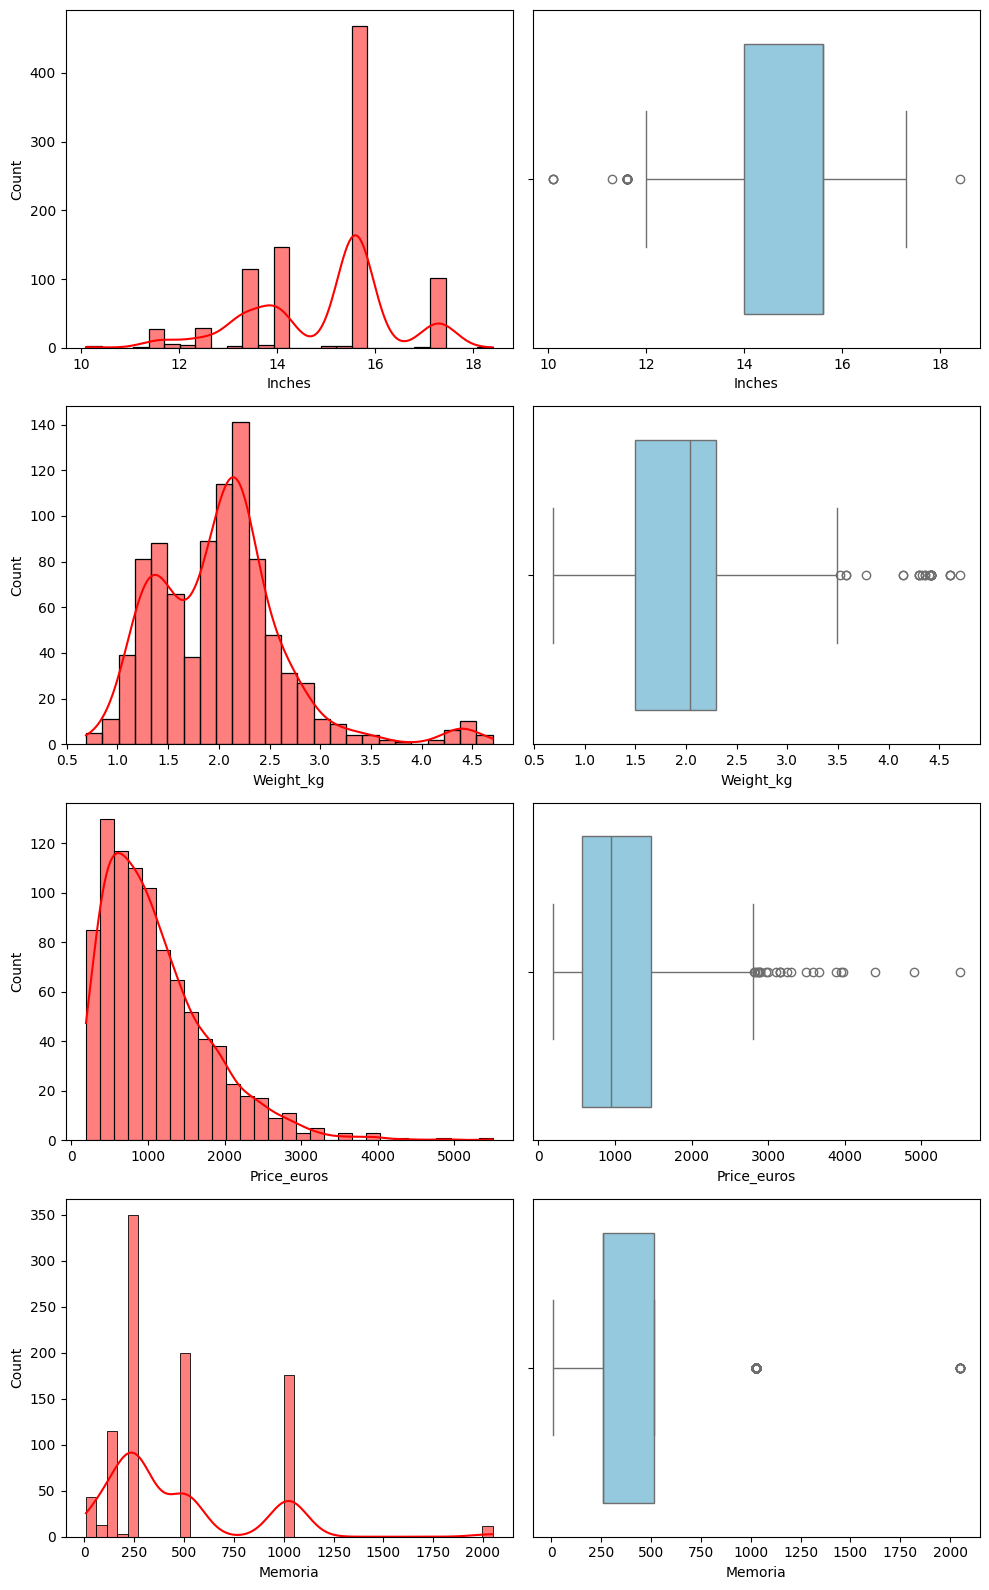

In [209]:
# Seleccionar variables numericas
col_num = df.select_dtypes(include=["float64"]).columns

# Configuración del gráfico
n_rows = len(col_num)
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4 * n_rows))

# Si axes es 1D (en caso de solo 1 fila), lo convierte en 2D
if n_rows == 1:
    axes = axes.reshape(1, 2)

# Graficar para cada columna numérica
for idx, column in enumerate(col_num):
    # Histograma
    sns.histplot(df[column], kde=True, ax=axes[idx, 0], color='red')
       
   
    # Boxplot horizontal
    sns.boxplot(x=df[column], ax=axes[idx, 1], color='skyblue')
  

# Ajuste
plt.tight_layout()
plt.show();



In [210]:
df.describe()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,Memoria
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,660.868421,14.957018,8.320175,2.012307,1109.652752,452.741228
std,382.437227,1.428753,5.227063,0.646003,705.906280,369.174132
min,1.000000,10.100000,2.000000,0.690000,191.900000,8.000000
25%,328.250000,14.000000,4.000000,1.500000,572.750000,256.000000
50%,658.000000,15.600000,8.000000,2.040000,949.000000,256.000000
75%,994.250000,15.600000,8.000000,2.300000,1468.000000,512.000000
max,1320.000000,18.400000,64.000000,4.700000,5499.000000,2048.000000


## Categóricas

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   laptop_ID          912 non-null    int64   
 1   Company            912 non-null    category
 2   Product            912 non-null    category
 3   TypeName           912 non-null    category
 4   Inches             912 non-null    float64 
 5   Ram_GB             912 non-null    int64   
 6   OpSys              912 non-null    category
 7   Weight_kg          912 non-null    float64 
 8   Price_euros        912 non-null    float64 
 9   Resolución         912 non-null    object  
 10  tipo_pantalla      912 non-null    object  
 11  Memoria            912 non-null    float64 
 12  Tipos_Memoria      912 non-null    object  
 13  tipo_cpu           912 non-null    object  
 14  velocidad_cpu_ghz  912 non-null    object  
 15  marca_gpu          912 non-null    object  
 16  modelo_g

In [212]:
# Convertir los object en categoricas 
text_columns1 = ['Resolución', 'tipo_pantalla', 'Tipos_Memoria', 
                'velocidad_cpu_ghz', 'marca_gpu','modelo_gpu','OpSys_general','Company','Product','TypeName','OpSys','OpSys_general']

for col in text_columns1:
    df[col] = df[col].astype('category')

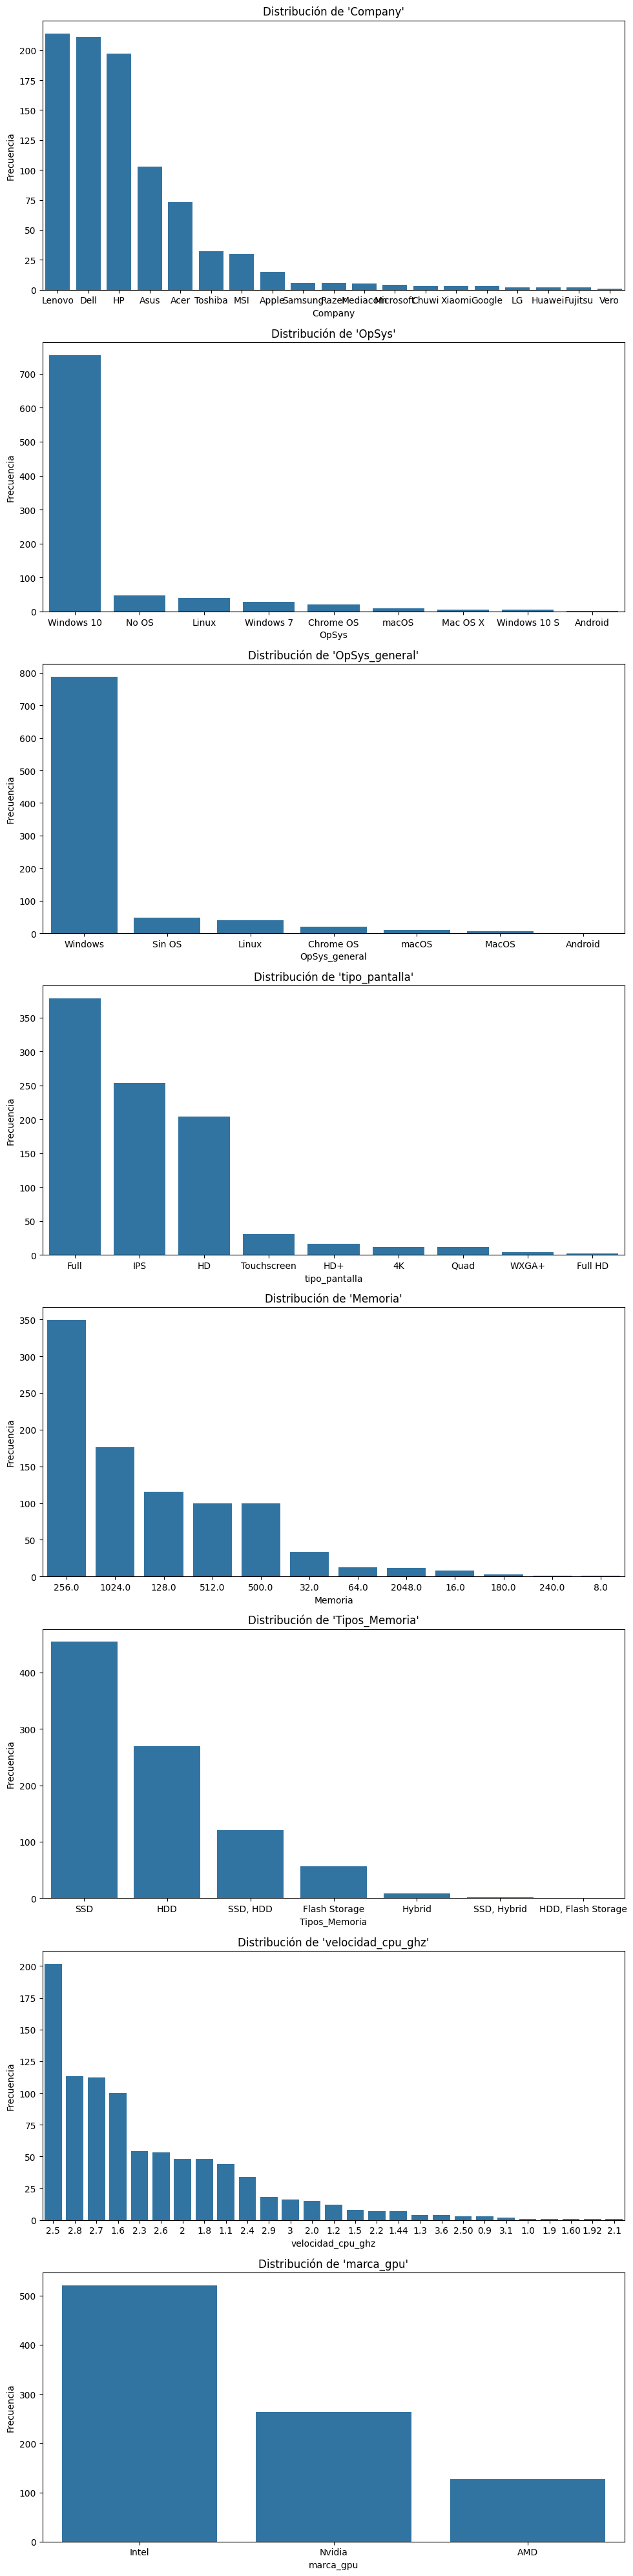

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que esta lista contiene los nombres de las columnas categóricas de tu DataFrame
categorical_columns = ['Company','OpSys','OpSys_general','tipo_pantalla','Memoria','Tipos_Memoria','velocidad_cpu_ghz','marca_gpu']  # Reemplaza con tus columnas categóricas

# Crear un subplot por cada columna categórica
plt.figure(figsize=(10, 5 * len(categorical_columns)))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Distribución de '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [214]:
df

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,Resolución,tipo_pantalla,Memoria,Tipos_Memoria,tipo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,1223,Dell,Inspiron 5567,Notebook,15.6,8,Windows 10,2.36,889.00,1920x1080,Full,256.0,SSD,Intel Core i5 7200U,2.5,AMD,Radeon R7 M445,Windows
1,78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,8,No OS,2.20,519.00,1920x1080,Full,2048.0,HDD,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,Sin OS
2,1267,Dell,XPS 13,2 in 1 Convertible,13.3,8,Windows 10,1.24,1813.00,3200x1800,Quad,256.0,SSD,Intel Core i5 7Y54,1.2,Intel,HD Graphics 615,Windows
3,161,Dell,Inspiron 5579,2 in 1 Convertible,15.6,8,Windows 10,1.56,1049.00,1920x1080,Full,256.0,SSD,Intel Core i7 8550U,1.8,Intel,UHD Graphics 620,Windows
4,922,LG,Gram 14Z970,Ultrabook,14.0,8,Windows 10,0.98,1899.00,1920x1080,IPS,512.0,SSD,Intel Core i7 7500U,2.7,Intel,HD Graphics 620,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,709,Lenovo,IdeaPad 320-15AST,Notebook,15.6,4,Windows 10,2.20,399.00,1920x1080,Full,256.0,SSD,AMD A9-Series 9420,2.9,AMD,Radeon 530,Windows
908,947,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1799.00,3200x1800,IPS,1024.0,SSD,Intel Core i7 6560U,2.2,Intel,Iris Graphics 540,Windows
909,590,Dell,Latitude 5580,Notebook,15.6,16,Windows 10,1.93,1537.39,1920x1080,Full,256.0,SSD,Intel Core i7 7600U,2.8,Nvidia,GeForce 930MX,Windows
910,1143,Lenovo,Legion Y520-15IKBN,Gaming,15.6,8,No OS,2.40,989.00,1920x1080,IPS,128.0,"SSD, HDD",Intel Core i5 7300HQ,2.5,Nvidia,GeForce GTX 1060,Sin OS


In [215]:
df.to_csv('prueba1')

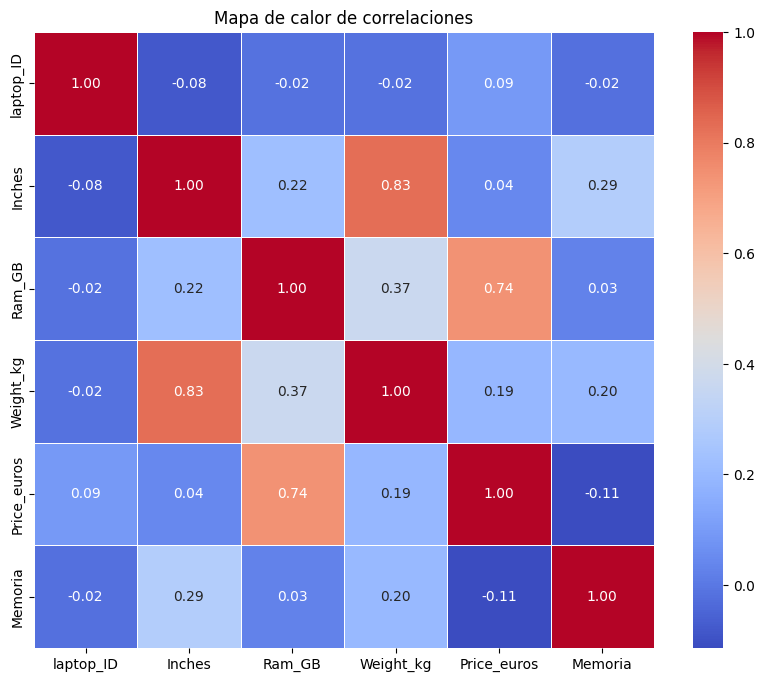

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para la correlación
df_numeric = df.select_dtypes(include=['number'])

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()
